# Machine Learning-Based Income Classification System of Individuals

In [6]:
# IMPORT NECESSARY LIBRARIES
from itertools import count
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.copy_on_write = True
pd.set_option('display.max_columns', 100)

In [7]:
# Load data
data = pd.read_csv("income-classifier-dataset.csv", na_values=[" ?"])

In [8]:
data.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [9]:
data.shape

(31978, 13)

In [10]:
# Check for null values
print(f"Null Values in brief:\n{data.isnull().sum()}\n")

Null Values in brief:
age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64



In [11]:
# Drop null values
data = data.dropna()

In [12]:
print(f"Null Values in brief:\n{data.isnull().sum()}\n")

Null Values in brief:
age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64



In [13]:
print(f"Data shape after dropping null values: {data.shape}")

Data shape after dropping null values: (30162, 13)


In [14]:
# Create a copy of dataset
data_copy_1 = data.copy()

In [15]:
data_copy_1.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [16]:
data_copy_1.info()
data_copy_1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


,age,capitalgain,capitalloss,hoursperweek
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1092.007858,88.372489,40.931238
std,13.134665,7406.346497,404.298370,11.979984
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## Frequency Tables

In [18]:
# Frequency Tables
print("Making Frequency Tables\n")
# Crosstable for gender proportion
gender = pd.crosstab(index=data_copy_1['gender'], columns='count', normalize=True)
print(f"Gender Proportion:\n{gender}\n")

# Two Way table for gender vs SalStat
gen_sal = pd.crosstab(index=data_copy_1['gender'], columns=data_copy_1['SalStat'], normalize='index', margins=True)
print(f"Gender vs Salary:\n{gen_sal}\n")

# Two Way table for JobType vs SalStat
jobType_sal = pd.crosstab(index=data_copy_1['JobType'], columns=data_copy_1['SalStat'], normalize='index', margins=True)
print(f"Job Type vs Salary:\n{jobType_sal}\n")

# Two Way table for occupation vs SalStat
occupation_sal = pd.crosstab(index=data_copy_1['occupation'], columns=data_copy_1['SalStat'], normalize='index', margins=True)
print(f"Occupation vs Salary:\n{occupation_sal}")

Making Frequency Tables

Gender Proportion:
col_0      count
gender          
Female  0.324315
Male    0.675685

Gender vs Salary:
SalStat  greater than 50,000  less than or equal to 50,000
gender                                                    
 Female             0.113678                      0.886322
 Male               0.313837                      0.686163
All                 0.248922                      0.751078

Job Type vs Salary:
SalStat            greater than 50,000  less than or equal to 50,000
JobType                                                             
 Federal-gov                  0.387063                      0.612937
 Local-gov                    0.294630                      0.705370
 Private                      0.218792                      0.781208
 Self-emp-inc                 0.558659                      0.441341
 Self-emp-not-inc             0.285714                      0.714286
 State-gov                    0.268960                      0.731040
 

## Making visualisations

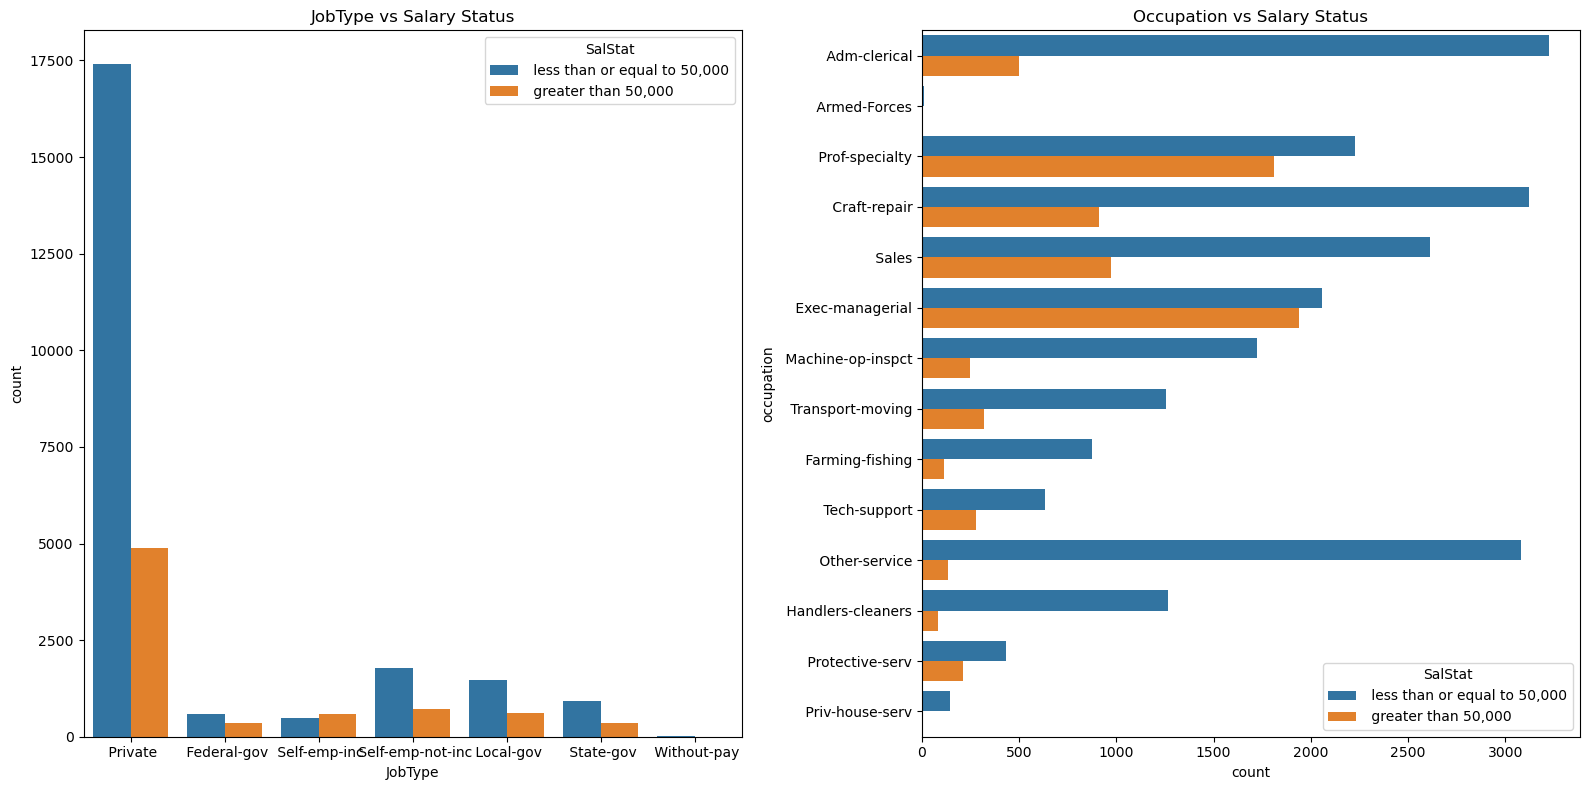

In [20]:
# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: JobType vs Salary Status
sns.countplot(
    x='JobType',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[0]  # First plot
)
ax[0].set_title("JobType vs Salary Status")

# Plot 2: Occupation vs Salary Status
sns.countplot(
    y='occupation',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[1]  # Second Plot
)
ax[1].set_title("Occupation vs Salary Status")

plt.tight_layout()
plt.show()

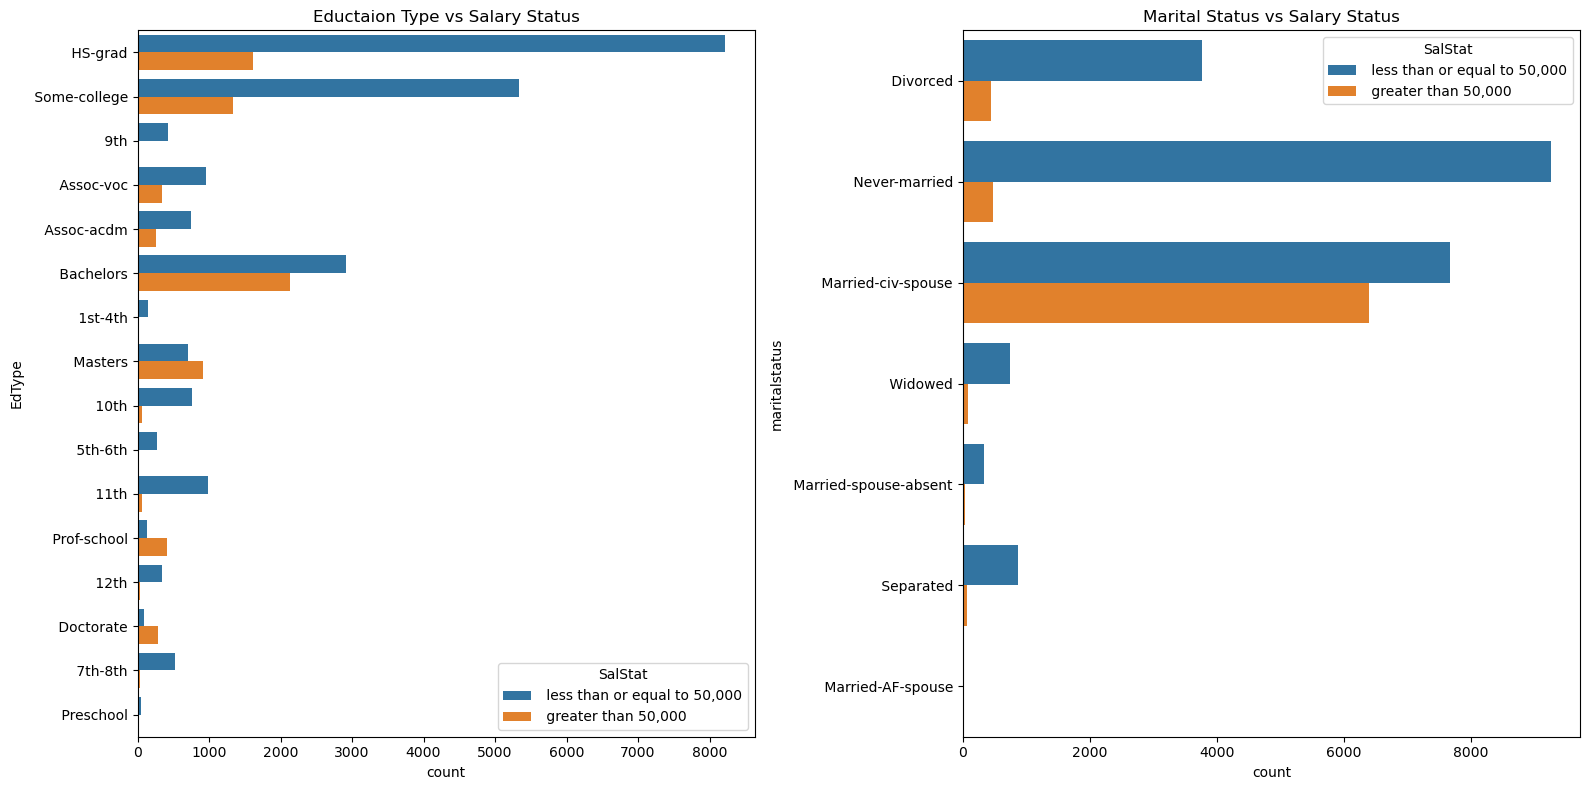

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Eductation Type vs Salary Status
sns.countplot(
    y='EdType',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[0]  # First plot
)
ax[0].set_title("Eductaion Type vs Salary Status")

# Marital Status vs Salary Status
sns.countplot(
    y='maritalstatus',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[1]  # Second Plot
)
ax[1].set_title("Marital Status vs Salary Status")

plt.tight_layout()
plt.show()

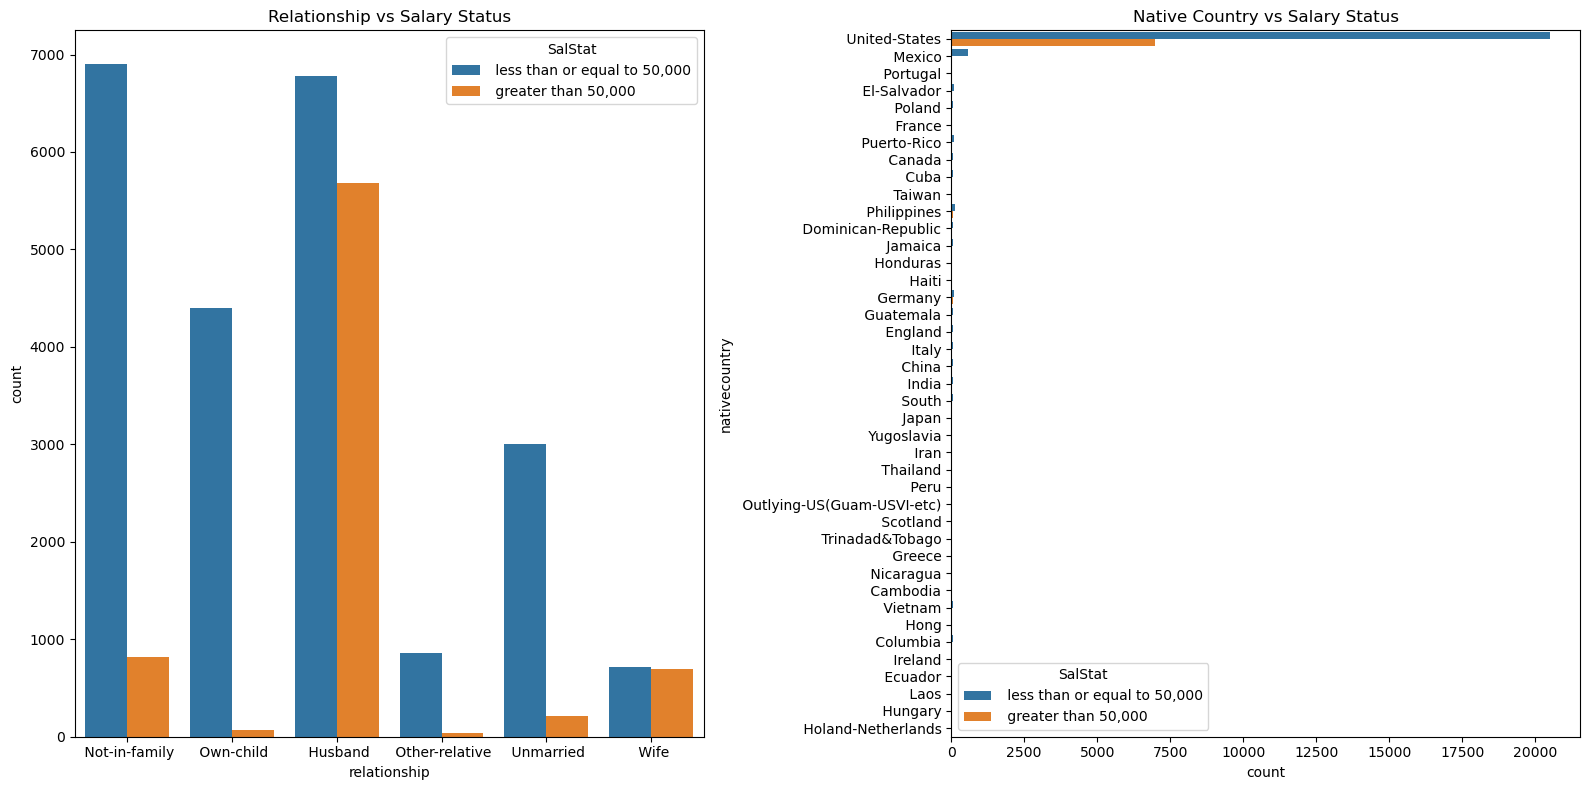

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Relationship vs Salary Status
sns.countplot(
    x='relationship',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[0]  # First plot
)
ax[0].set_title("Relationship vs Salary Status")

# Native Country vs Salary Status
sns.countplot(
    y='nativecountry',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[1]  # Second Plot
)
ax[1].set_title("Native Country vs Salary Status")

plt.tight_layout()
plt.show()

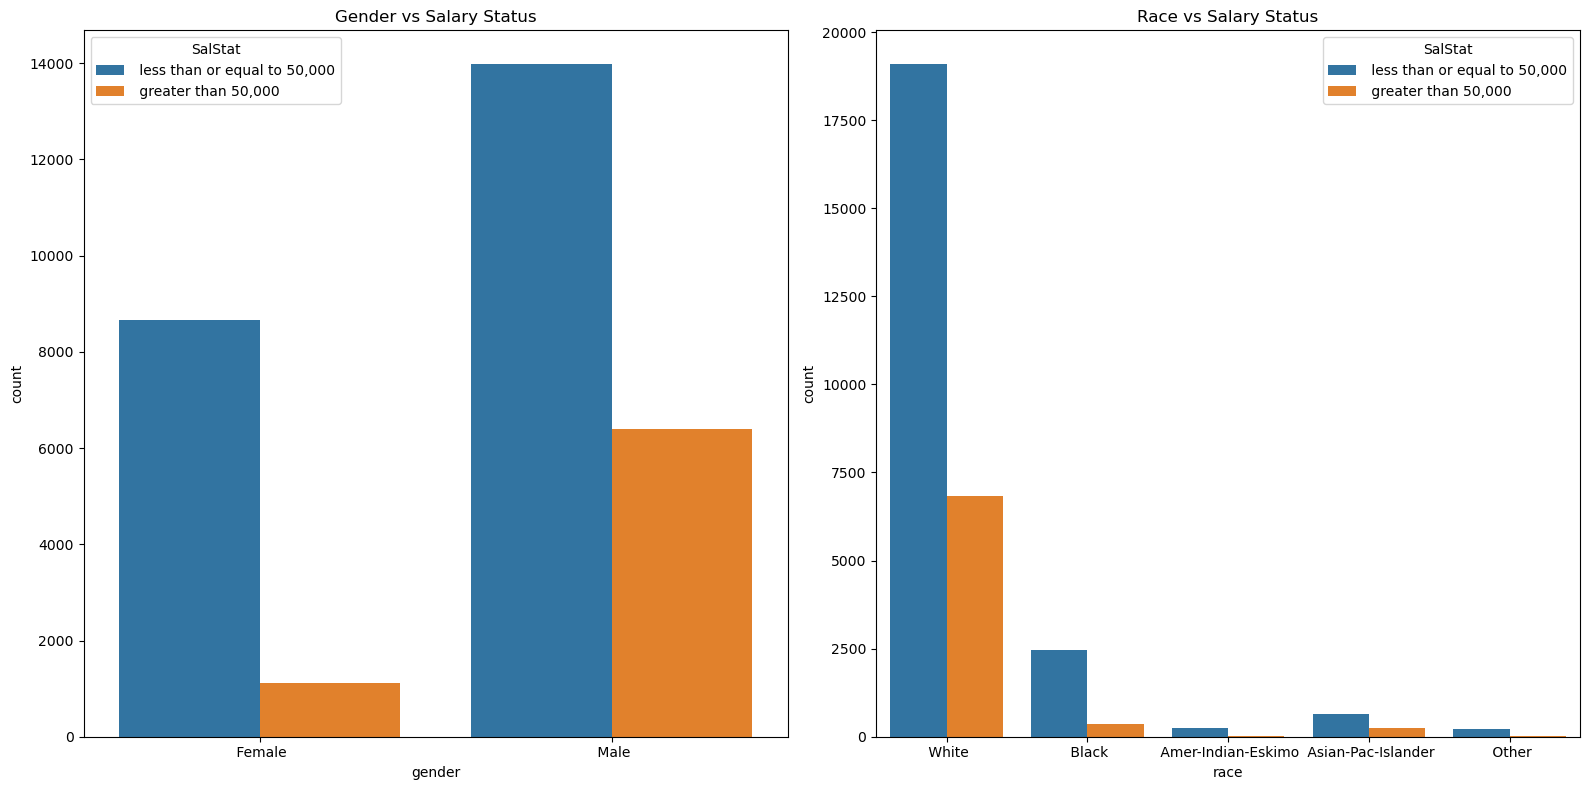

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Gender vs Salary Status
sns.countplot(
    x='gender',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[0]  # First plot
)
ax[0].set_title("Gender vs Salary Status")

# Race vs Salary Status
sns.countplot(
    x='race',
    hue='SalStat',
    data=data_copy_1,
    ax=ax[1]  # Second Plot
)
ax[1].set_title("Race vs Salary Status")

plt.tight_layout()
plt.show()

## Preparing data for models

In [25]:
# Creating a new copy of dataset for model development
data_copy_2 = data_copy_1.copy()

In [26]:
data_copy_2.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [27]:
# Re-indexing output variable (SalStat)
data_copy_2['SalStat'] = data_copy_2.loc[:,'SalStat'].map({
                                                     ' less than or equal to 50,000' : 0,
                                                     ' greater than 50,000' : 1
                                                     })

In [28]:
data_copy_2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [29]:
# Creating dummy variables (encoding categorical variables)
data_dummies_1 = pd.get_dummies(data_copy_2, drop_first = True).astype(int)

In [30]:
data_dummies_1.head(10)

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,44,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,51,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,20,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,19,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,45,0,0,55,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
# Creating a list and separating input and output variables
columns_list = list(data_dummies_1.columns) # list of all columns
input_features = list(set(columns_list) - set(['SalStat'])) # list of input features
print(f"Input Features:\n {input_features}")

Input Features:
 ['nativecountry_ Poland', 'EdType_ Bachelors', 'maritalstatus_ Never-married', 'occupation_ Exec-managerial', 'nativecountry_ Scotland', 'JobType_ Private', 'nativecountry_ England', 'nativecountry_ Hong', 'hoursperweek', 'age', 'nativecountry_ Haiti', 'maritalstatus_ Separated', 'occupation_ Transport-moving', 'occupation_ Sales', 'EdType_ 1st-4th', 'nativecountry_ Yugoslavia', 'maritalstatus_ Married-civ-spouse', 'occupation_ Prof-specialty', 'nativecountry_ Philippines', 'nativecountry_ Guatemala', 'EdType_ Assoc-voc', 'nativecountry_ Columbia', 'occupation_ Other-service', 'relationship_ Unmarried', 'EdType_ HS-grad', 'occupation_ Handlers-cleaners', 'nativecountry_ Holand-Netherlands', 'capitalgain', 'EdType_ 11th', 'nativecountry_ Iran', 'nativecountry_ Thailand', 'EdType_ 5th-6th', 'race_ Asian-Pac-Islander', 'EdType_ 7th-8th', 'nativecountry_ Peru', 'relationship_ Own-child', 'JobType_ Self-emp-not-inc', 'maritalstatus_ Married-spouse-absent', 'occupation_ Farm

In [32]:
# Creating input (x), output (y)

x = data_dummies_1[input_features].values
y = data_dummies_1['SalStat'].values

print(f"Input Values:\n{x}\n")
print(f"Output Values:\n{y}")

Input Values:
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]

Output Values:
[0 0 1 ... 0 0 0]


In [33]:
# split data into training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)
# shape of training and testing sets
print(f"Train x shape: {train_x.shape}\nTest x shape: {test_x.shape}\nTrain y shape: {train_y.shape}\nTest y shape: {test_y.shape}")

Train x shape: (24129, 94)
Test x shape: (6033, 94)
Train y shape: (24129,)
Test y shape: (6033,)


## Models with all variables

In [35]:
# Creating logistic regression model
logistic = LogisticRegression()
logistic.fit(train_x, train_y)
lr_prediction = logistic.predict(test_x)

# Confusion Matrix and accuracy
lr_c_matrix = confusion_matrix(test_y, lr_prediction)
lr_accuracy = accuracy_score(test_y, lr_prediction)
print(f"Confusion Matrix:\n{lr_c_matrix}\n\n Accuracy:\n{lr_accuracy*100}")

Confusion Matrix:
[[4196  317]
 [ 652  868]]

 Accuracy:
83.93833913475882


In [36]:
# Creating Random Forest model
random_forest = RandomForestClassifier(random_state=1,
                                       n_estimators=100,
                                       max_depth=20,
                                       min_samples_split=5
                                      )
random_forest.fit(train_x, train_y)

# Predicting with the Random Forest model
rf_prediction = random_forest.predict(test_x)

# Confusion Matrix and accuracy for Random Forest model
rf_c_matrix = confusion_matrix(test_y, rf_prediction)
rf_accuracy = accuracy_score(test_y, rf_prediction)

print(f"Random Forest Confusion Matrix:\n{rf_c_matrix}\n")
print(f"Random Forest Accuracy:\n{rf_accuracy*100}")

Random Forest Confusion Matrix:
[[4272  241]
 [ 626  894]]

Random Forest Accuracy:
85.62904027846842


In [37]:
# Creating K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train_x, train_y)

# Predicting with the KNN model
knn_prediction = knn.predict(test_x)

# Confusion Matrix and accuracy for KNN model
knn_c_matrix = confusion_matrix(test_y, knn_prediction)
knn_accuracy = accuracy_score(test_y, knn_prediction)

print(f"KNN Confusion Matrix:\n{knn_c_matrix}\n")
print(f"KNN Accuracy:\n{knn_accuracy*100}\n")

# Checking for misclassified values
missClass = ((test_y != knn_prediction).sum())
print(f"Missclassified Values: {missClass}")

KNN Confusion Matrix:
[[4222  291]
 [ 711  809]]

KNN Accuracy:
83.39134758826454

Missclassified Values: 1002


## Removing insignificant variables

In [39]:
# Creating another copy of data_copy_1 dataset
data_copy_3 = data_copy_1.copy()

In [40]:
# Removing insignificant variables
insignificant_variables = ['gender',
                           'nativecountry',
                           'race',
                           'JobType'
                          ]
significant_dataset = data_copy_3.drop(insignificant_variables, axis=1)

# Re-indexing output variable (SalStat)
significant_dataset['SalStat'] = significant_dataset.loc[:,'SalStat'].map({' less than or equal to 50,000':0,
                                                                           ' greater than 50,000':1}
                                                         )
significant_dataset.head(10) # final dataset

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
5,44,HS-grad,Widowed,Exec-managerial,Unmarried,0,0,40,0
6,51,HS-grad,Married-civ-spouse,Craft-repair,Husband,0,0,40,0
7,20,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,0
9,19,HS-grad,Never-married,Machine-op-inspct,Own-child,0,0,40,0
10,45,Some-college,Married-civ-spouse,Craft-repair,Husband,0,0,55,1


## Preparing new dataset for the models

In [42]:
# Creating dummy variables (encoding categorical variables)
data_dummies_2 = pd.get_dummies(significant_dataset, drop_first = True).astype(int)

In [43]:
data_dummies_2.head(10)

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,44,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,51,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,20,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,19,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,45,0,0,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Creating a list and separating input and output variables
columns_list_2 = list(data_dummies_2.columns) # list of all columns
input_features_2 = list(set(columns_list_2) - set(['SalStat'])) # list of input features
print(f"Input Features:\n {input_features_2}")

Input Features:
 ['occupation_ Protective-serv', 'capitalloss', 'occupation_ Craft-repair', 'EdType_ Bachelors', 'maritalstatus_ Never-married', 'occupation_ Priv-house-serv', 'occupation_ Exec-managerial', 'EdType_ 9th', 'occupation_ Machine-op-inspct', 'occupation_ Tech-support', 'hoursperweek', 'maritalstatus_ Widowed', 'age', 'maritalstatus_ Separated', 'occupation_ Transport-moving', 'occupation_ Sales', 'EdType_ 1st-4th', 'maritalstatus_ Married-civ-spouse', 'occupation_ Prof-specialty', 'EdType_ Assoc-voc', 'occupation_ Other-service', 'EdType_ Some-college', 'relationship_ Unmarried', 'EdType_ HS-grad', 'occupation_ Handlers-cleaners', 'capitalgain', 'EdType_ Masters', 'EdType_ 11th', 'EdType_ Preschool', 'EdType_ 5th-6th', 'relationship_ Other-relative', 'EdType_ 7th-8th', 'relationship_ Wife', 'EdType_ Assoc-acdm', 'relationship_ Own-child', 'occupation_ Armed-Forces', 'EdType_ Doctorate', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Married-AF-spouse', 'occupation

In [45]:
# Creating input (x2), output (y2)

x2 = data_dummies_2[input_features_2].values
y2 = data_dummies_2['SalStat'].values

print(f"Input Values:\n{x2}\n")
print(f"Output Values:\n{y2}")

Input Values:
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

Output Values:
[0 0 1 ... 0 0 0]


In [46]:
# split data into training and testing
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size=0.2, random_state=1)
# shape of training and testing sets
print(f"Train x2 shape: {train_x2.shape}\nTest x2 shape: {test_x2.shape}\nTrain y2 shape: {train_y2.shape}\nTest y2 shape: {test_y2.shape}")

Train x2 shape: (24129, 43)
Test x2 shape: (6033, 43)
Train y2 shape: (24129,)
Test y2 shape: (6033,)


## Models without insignificant variables

In [48]:
# Creating logistic regression model
logistic_2 = LogisticRegression()
logistic_2.fit(train_x2, train_y2)
lr_prediction_2 = logistic_2.predict(test_x2)

# Confusion Matrix and accuracy
lr_c_matrix_2 = confusion_matrix(test_y2, lr_prediction_2)
lr_accuracy_2 = accuracy_score(test_y2, lr_prediction_2)
print(f"Confusion Matrix:\n{lr_c_matrix_2}\n\n Accuracy:\n{lr_accuracy_2*100}")

Confusion Matrix:
[[4202  311]
 [ 660  860]]

 Accuracy:
83.90518813194099


In [49]:
# Creating Random Forest model
random_forest_2 = RandomForestClassifier(random_state=1,
                                       n_estimators=100,
                                       max_depth=20,
                                       min_samples_split=5
                                      )
random_forest_2.fit(train_x2, train_y2)

# Predicting with the Random Forest model
rf_prediction_2 = random_forest_2.predict(test_x2)

# Confusion Matrix and accuracy for Random Forest model
rf_c_matrix_2 = confusion_matrix(test_y2, rf_prediction_2)
rf_accuracy_2 = accuracy_score(test_y2, rf_prediction_2)

print(f"Random Forest Confusion Matrix:\n{rf_c_matrix_2}\n")
print(f"Random Forest Accuracy:\n{rf_accuracy_2*100}")

Random Forest Confusion Matrix:
[[4266  247]
 [ 654  866]]

Random Forest Accuracy:
85.06547323056523


In [50]:
# Creating K-Nearest Neighbors (KNN) model
knn_2 = KNeighborsClassifier(n_neighbors=8)
knn_2.fit(train_x2, train_y2)

# Predicting with the KNN model
knn_prediction_2 = knn_2.predict(test_x2)

# Confusion Matrix and accuracy for KNN model
knn_c_matrix_2 = confusion_matrix(test_y2, knn_prediction_2)
knn_accuracy_2 = accuracy_score(test_y2, knn_prediction_2)

print(f"KNN Confusion Matrix:\n{knn_c_matrix_2}\n")
print(f"KNN Accuracy:\n{knn_accuracy_2*100}\n")

# Checking for misclassified values
missClass_2 = ((test_y2 != knn_prediction_2).sum())
print(f"Missclassified Values: {missClass_2}")

KNN Confusion Matrix:
[[4211  302]
 [ 707  813]]

KNN Accuracy:
83.27531907840212

Missclassified Values: 1009


## Summary of every model's accuracy

In [57]:
# SUMMARY
print("ACCURACY OF THE SYSTEM'S PERFORMANCE (in %):")
print("Having all variables:\n")
print(f"Logistic Regression: {lr_accuracy*100}")
print(f"Random Forest:       {rf_accuracy*100}")
print(f"KNN:                 {knn_accuracy*100}")
print("\nRemoving insignificant variables:\n")
print(f"Logistic Regression: {lr_accuracy_2*100}")
print(f"Random Forest:       {rf_accuracy_2*100}")
print(f"KNN:                 {knn_accuracy_2*100}")

print("\nAs we can see that removing insignificant variables does not affect the data much.\nTherefore remove them in order reduce our models complexity.")

ACCURACY OF THE SYSTEM'S PERFORMANCE (in %):
Having all variables:

Logistic Regression: 83.93833913475882
Random Forest:       85.62904027846842
KNN:                 83.39134758826454

Removing insignificant variables:

Logistic Regression: 83.90518813194099
Random Forest:       85.06547323056523
KNN:                 83.27531907840212

As we can see that removing insignificant variables does not affect the data much.
Therefore remove them in order reduce our models complexity.


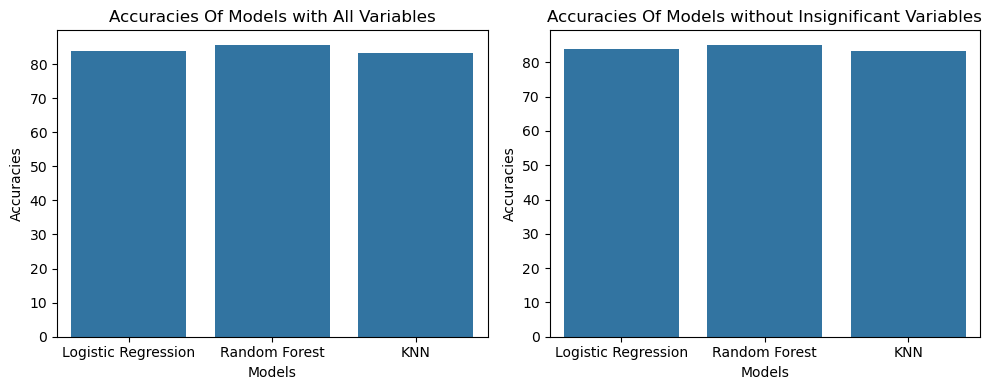

In [130]:
# Visualising accuracies of the models with and without all variables

accuracy_data_1 = pd.DataFrame({
    'Models': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Accuracies': [lr_accuracy*100, rf_accuracy*100, knn_accuracy*100]
})

accuracy_data_2 = pd.DataFrame({
    'Models': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Accuracies': [lr_accuracy_2*100, rf_accuracy_2*100, knn_accuracy_2*100]
})

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot first barplot
sns.barplot(x='Models', y='Accuracies', data=accuracy_data_1, ax=ax[0])
ax[0].set_title("Accuracies Of Models with All Variables")

# Plot second barplot
sns.barplot(x='Models', y='Accuracies', data=accuracy_data_2, ax=ax[1])
ax[1].set_title("Accuracies Of Models without Insignificant Variables")

plt.tight_layout()
plt.show()

## Making prediction with sample input

In [52]:
dict_inp = {
    'age':25, 'capitalgain':0, 'capitalloss':0, 'hoursperweek':55,
    'EdType_ 11th':0, 'EdType_ 12th':0, 'EdType_ 1st-4th':0, 'EdType_ 5th-6th':0,
    'EdType_ 7th-8th':0, 'EdType_ 9th':0, 'EdType_ Assoc-acdm':0, 'EdType_ Assoc-voc':0,
    'EdType_ Bachelors':0, 'EdType_ Doctorate':0, 'EdType_ HS-grad':0, 'EdType_ Masters':0,
    'EdType_ Preschool':0, 'EdType_ Prof-school':0, 'EdType_ Some-college':1,
    'maritalstatus_ Married-AF-spouse':0, 'maritalstatus_ Married-civ-spouse':1, 'maritalstatus_ Married-spouse-absent':0,
    'maritalstatus_ Never-married':1, 'maritalstatus_ Separated':0, 'maritalstatus_ Widowed':0,
    'occupation_ Armed-Forces':0, 'occupation_ Craft-repair':1, 'occupation_ Exec-managerial':0,
    'occupation_ Farming-fishing':0, 'occupation_ Handlers-cleaners':0, 'occupation_ Machine-op-inspct':0, 'occupation_ Other-service':0,
    'occupation_ Priv-house-serv':0, 'occupation_ Prof-specialty':0, 'occupation_ Protective-serv':0,
    'occupation_ Sales':0, 'occupation_ Tech-support':0, 'occupation_ Transport-moving':0,
    'relationship_ Not-in-family':0, 'relationship_ Other-relative':0, 'relationship_ Own-child':0,
    'relationship_ Unmarried':0, 'relationship_ Wife':0
    }

# Converting to dataframe
samp_input = pd.DataFrame([dict_inp])

In [53]:
# Prediction with logistic regression model
lr_prediction_sample = logistic_2.predict(samp_input)
print(f"Prediction for sample input:, {lr_prediction_sample}")

Prediction for sample input:, [1]


In [54]:
# Prediction with random forest model
rf_prediction_sample = random_forest_2.predict(samp_input)
print(f"Prediction for sample input:, {rf_prediction_sample}")

Prediction for sample input:, [0]


In [55]:
# Prediction with KNN model
knn_prediction_sample = knn_2.predict(samp_input)
print(f"Prediction for sample input:, {knn_prediction_sample}")

Prediction for sample input:, [0]


# End